In [1]:
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('car_evaluation.csv',header = None) # loading data 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data.columns = ['buying','maint','doors','persons','lug_boot','safety','target']
data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
data.isnull().any() # checking for null values

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
target      False
dtype: bool

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,target
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [10]:
col_list = list(data.columns)

In [11]:
train, test = train_test_split(data,test_size = 0.2)

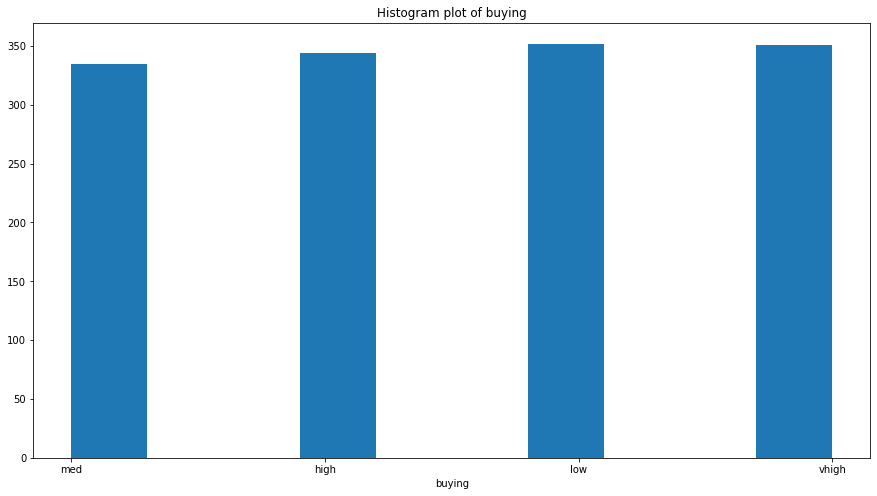

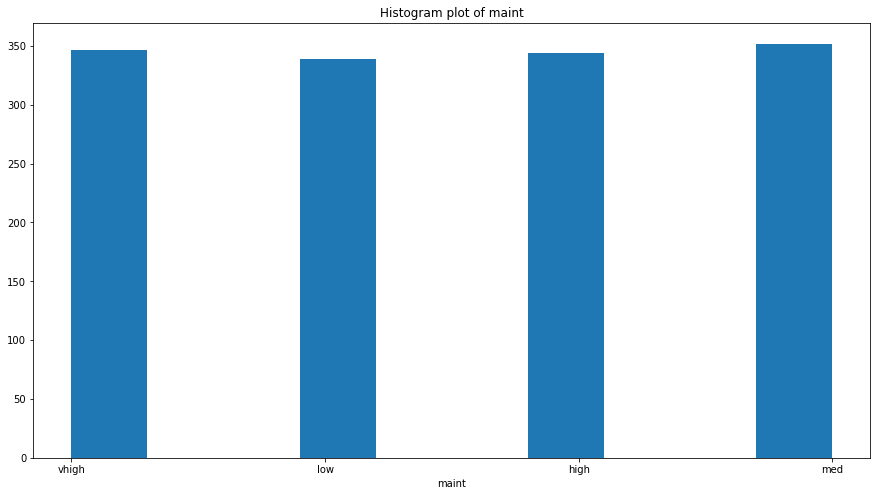

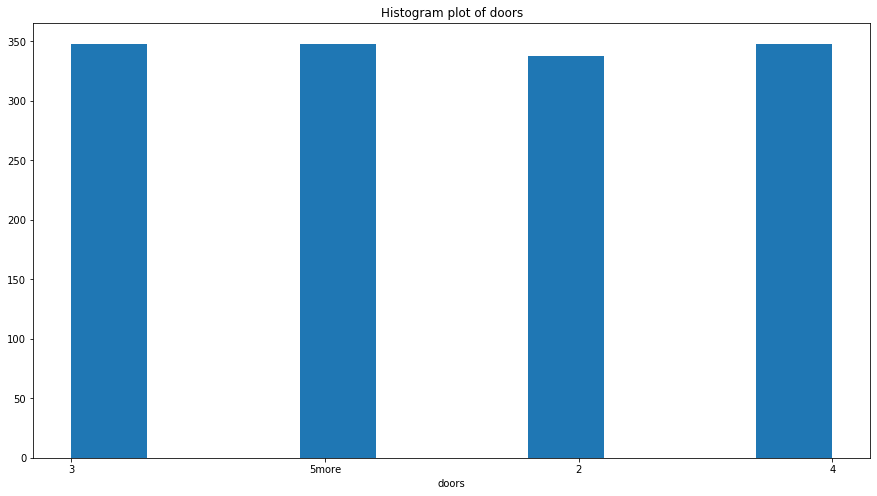

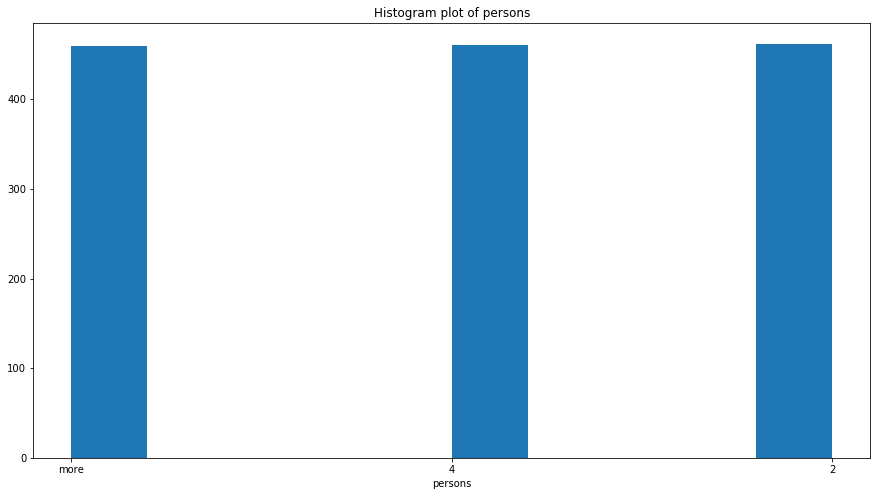

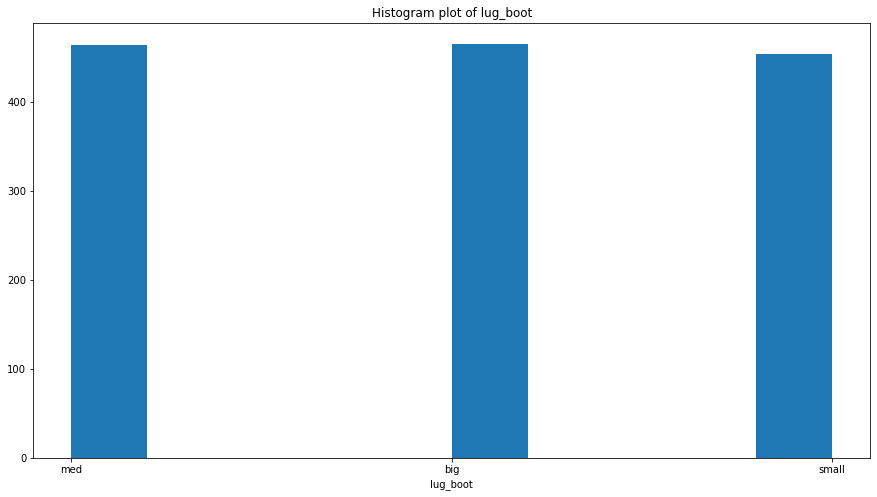

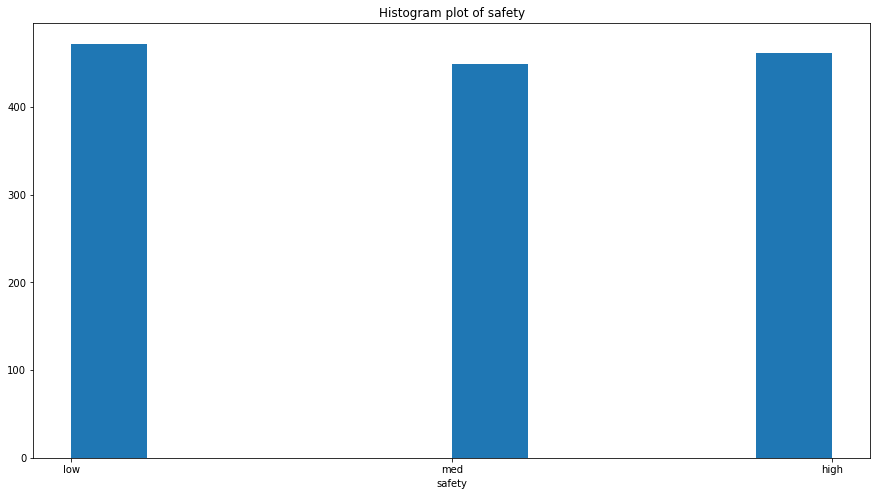

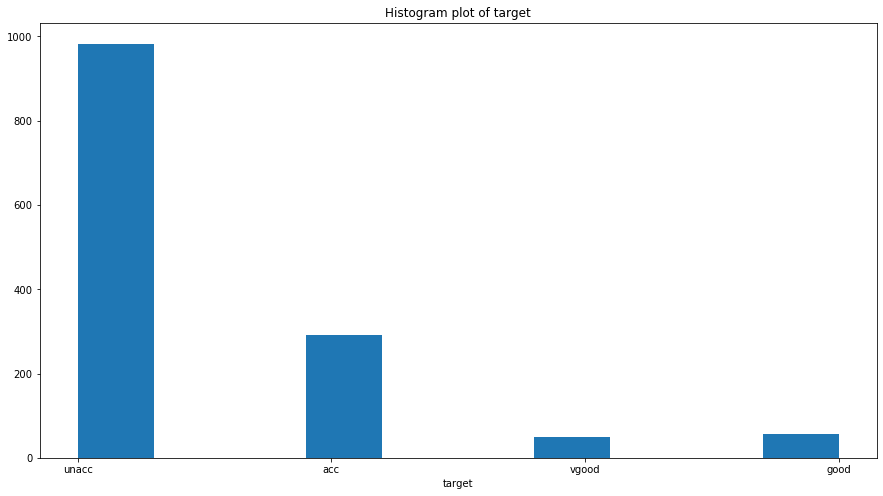

In [14]:
# Histograms of all features
for i in col_list:
    fig, ax = plt.subplots(figsize=(15,8))
    try:
        plt.hist(train[i])
        plt.title(f'Histogram plot of {i}')
        plt.xlabel(i)
        plt.savefig(f'images/hist_{i}.png')
        plt.show()
    except ValueError as ve:
        pass
    

In [16]:
display(data['lug_boot'].unique())
display(data['buying'].unique())
display(data['maint'].unique())
display(data['doors'].unique())
display(data['persons'].unique())
display(data['safety'].unique())
display(data['target'].unique())

array(['small', 'med', 'big'], dtype=object)

array(['vhigh', 'high', 'med', 'low'], dtype=object)

array(['vhigh', 'high', 'med', 'low'], dtype=object)

array(['2', '3', '4', '5more'], dtype=object)

array(['2', '4', 'more'], dtype=object)

array(['low', 'med', 'high'], dtype=object)

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [78]:
#Selectin only categorical features for pie-charts
data1 = train.drop(columns=['Age','fnlwgt','No. of education years','Capital_Gain','Capital_Loss','Working_Hours'])

In [17]:
from collections import Counter

Counter({'low': 352, 'vhigh': 351, 'high': 344, 'med': 335})


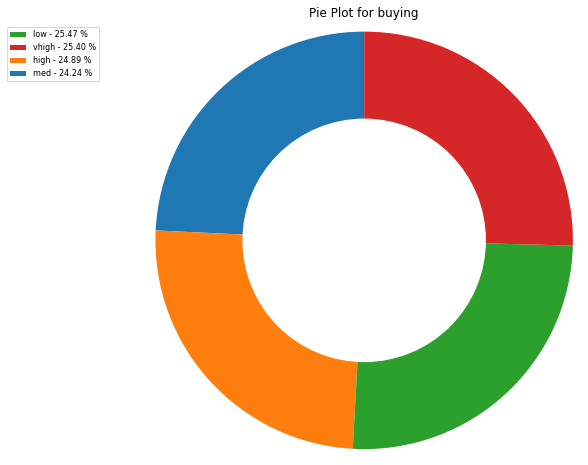

Counter({'med': 352, 'vhigh': 347, 'high': 344, 'low': 339})


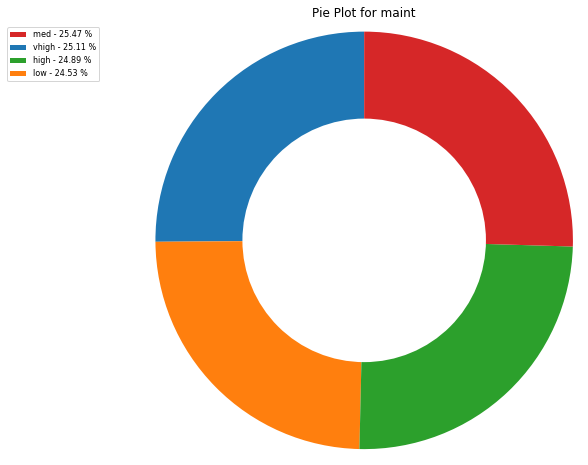

Counter({'3': 348, '5more': 348, '4': 348, '2': 338})


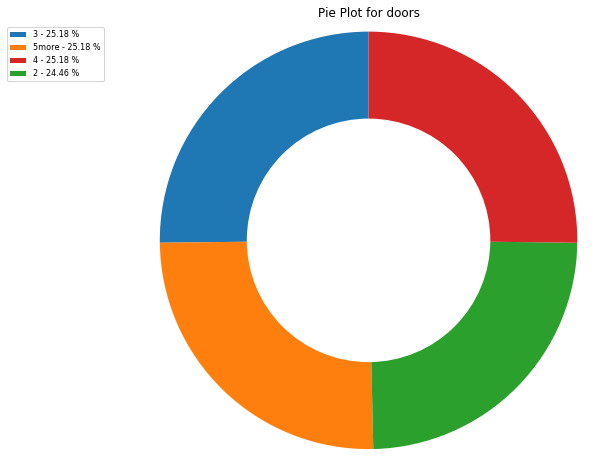

Counter({'2': 462, '4': 461, 'more': 459})


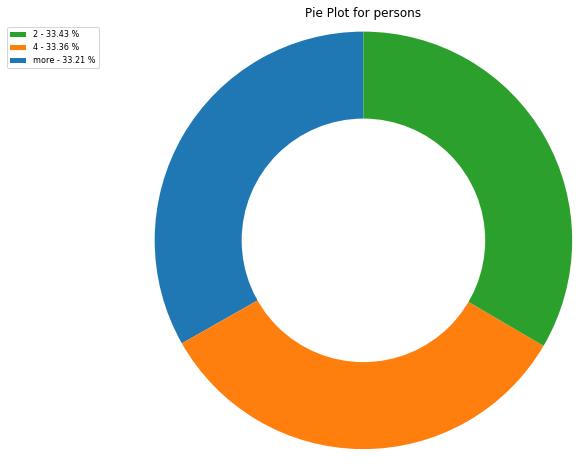

Counter({'big': 465, 'med': 464, 'small': 453})


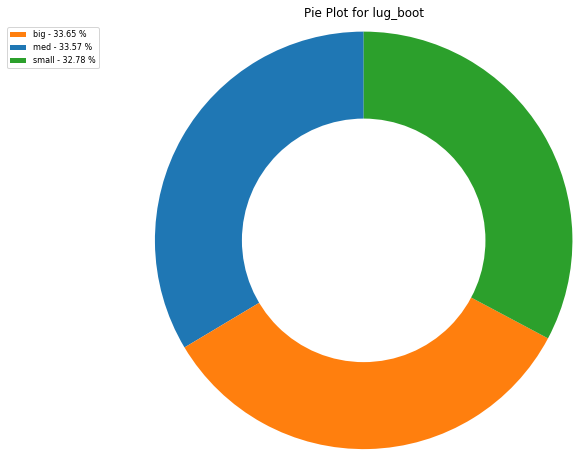

Counter({'low': 472, 'high': 461, 'med': 449})


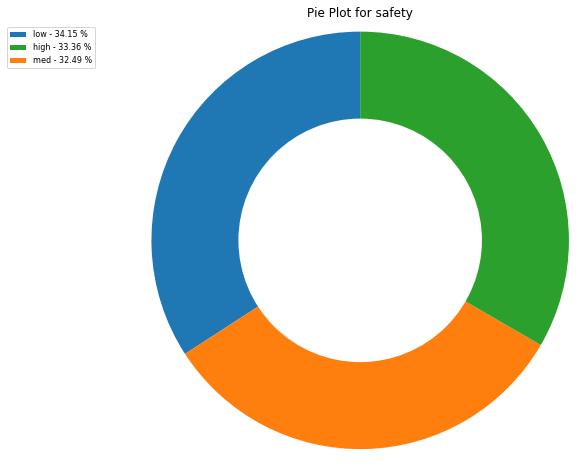

Counter({'unacc': 983, 'acc': 292, 'good': 57, 'vgood': 50})


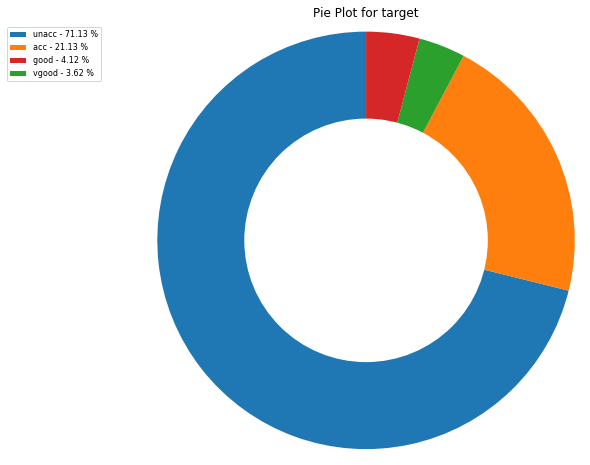

In [120]:
# Pie charts for the categorical features
for i in list(train.columns):
    fig, ax = plt.subplots(figsize=(8,8))
    #ax.set_title('Pie Chart of male and female who did not survive')
    #if i == 'Native':
    dct = Counter(train[i])
    y = np.array(list(dct.values()))
    x = np.array(list(dct.keys()))
    print(dct)
    #print(y)
#     ax.pie(dct.values(),labels = list(dct.keys()),autopct='%1.1f%%',pctdistance = 0.5,shadow=True, startangle=90)
#     ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
   
    porcent = 100.*y/y.sum()
    #print(y)
    
#     centre_circle = plt.Circle((0,0),0.70,fc='white')
#     fig = plt.gcf()
#     fig.gca().add_artist(centre_circle)
    patches, texts = plt.pie(y, startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))

    lgd = ax.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
               fontsize=8)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(f'Pie Plot for {i}')
    #plt.savefig(f'images/pie_{i}.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

#         plt.show()
#         dct = Counter(data1[i])
#         ax.pie(dct.values(), labels = list(dct.keys()),autopct='%1.1f%%',shadow=True, startangle=90)
#         ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#         #plt.savefig('images/pie_mf_0.png')

#         plt.show()

In [70]:
data.columns

Index(['Age', 'Work_Class', 'fnlwgt', 'Education', 'No. of education years',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Working_Hours', 'Native', 'Income'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [21]:
train.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target'], dtype='object')

In [32]:
test.head()

,buying,maint,doors,persons,lug_boot,safety,target
1159,med,med,4,more,big,med,acc
1430,low,high,2,more,big,high,vgood
1638,low,low,2,more,small,low,unacc
999,med,high,3,2,small,low,unacc
1545,low,med,3,2,big,low,unacc


In [22]:
train.head()

,buying,maint,doors,persons,lug_boot,safety,target
912,med,vhigh,3,more,med,low,unacc
529,high,vhigh,5more,4,big,med,unacc
1639,low,low,2,more,small,med,unacc
1076,med,high,5more,more,med,high,acc
512,high,vhigh,4,more,big,high,unacc


In [45]:
X_train = train.drop(columns=['target'])
y_train = train['target']
X_test = test.drop(columns=['target'])
y_test = test['target']

In [46]:
# Ordinal Encoding categorical features
encoded_trainX = pd.DataFrame()
encoded_testX = pd.DataFrame()
#for col in X_train.columns:
enc = OrdinalEncoder()
enc.fit(X_train)
encoded_trainX = pd.DataFrame(enc.transform(X_train))
encoded_testX = pd.DataFrame(enc.transform(X_test))
enc = LabelEncoder()
enc.fit(y_train)
enc_trainY = enc.transform(y_train)
enc_testY = enc.transform(y_test)

In [47]:
encoded_trainX.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
encoded_testX.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [48]:
encoded_trainX.head()

,buying,maint,doors,persons,lug_boot,safety
0,2.0,3.0,1.0,2.0,1.0,1.0
1,0.0,3.0,3.0,1.0,0.0,2.0
2,1.0,1.0,0.0,2.0,2.0,2.0
3,2.0,0.0,3.0,2.0,1.0,0.0
4,0.0,3.0,2.0,2.0,0.0,0.0


In [49]:
enc.classes_

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
# Building the Decision tree model and fitting on train data
clf = DecisionTreeClassifier()
clf.fit(encoded_trainX,enc_trainY)
clf.score(encoded_trainX,enc_trainY) # accuracy on train data

1.0

In [59]:
clf.score(encoded_testX,enc_testY) # accuracy on train data

0.9855491329479769

In [117]:
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"


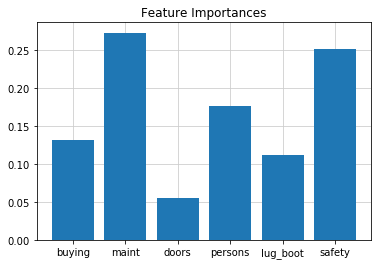

In [119]:
fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(numpy.arange(0, 1, 0.1))
#ax.set_yticks(numpy.arange(0, 1., 0.1))
plt.bar(list(encoded_trainX.columns),clf.feature_importances_)
#plt.grid()
ax.set_axisbelow(True)
ax.set_title('Feature Importances')
plt.savefig('images/feat_imp.png')
plt.show()

In [114]:
clf.get_depth()

14

In [65]:
clf.get_n_leaves()

91

In [ ]:
en

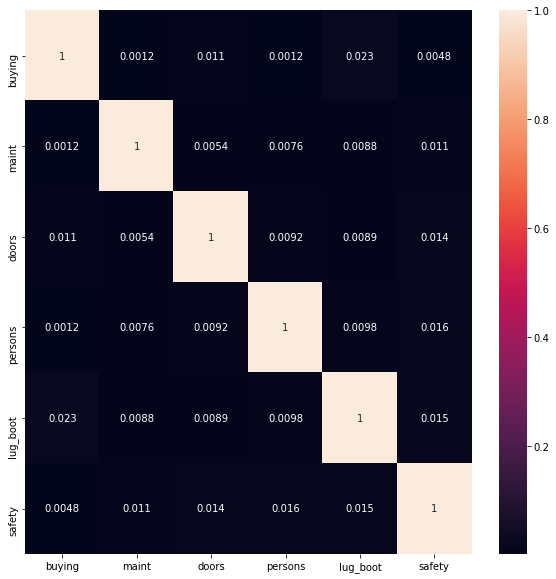

In [69]:
# Correlation between features
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(abs(pd.DataFrame(encoded_trainX).corr()),annot=True)
plt.savefig('images/corr.png')
plt.show()

In [72]:
from sklearn import tree

In [70]:
len(data)

1728

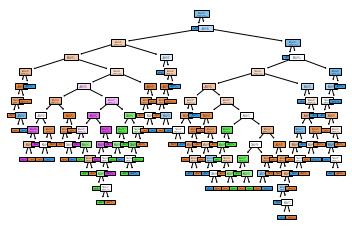

In [88]:
plt.figure()
tree.plot_tree(clf,filled=True)
plt.show()

In [79]:
train.column

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [99]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus

In [98]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [102]:
import io

In [105]:
import graphviz
dot_data = io.StringIO()
# tree.export_graphviz(dectree, out_file=dotfile)
# graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
# graph.write_png("dtree.png")
tree.export_graphviz(clf, out_file=dot_data, feature_names=encoded_trainX.columns,class_names=['unacc', 'acc', 'vgood', 'good'],filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('my_decision_tree.png')

True

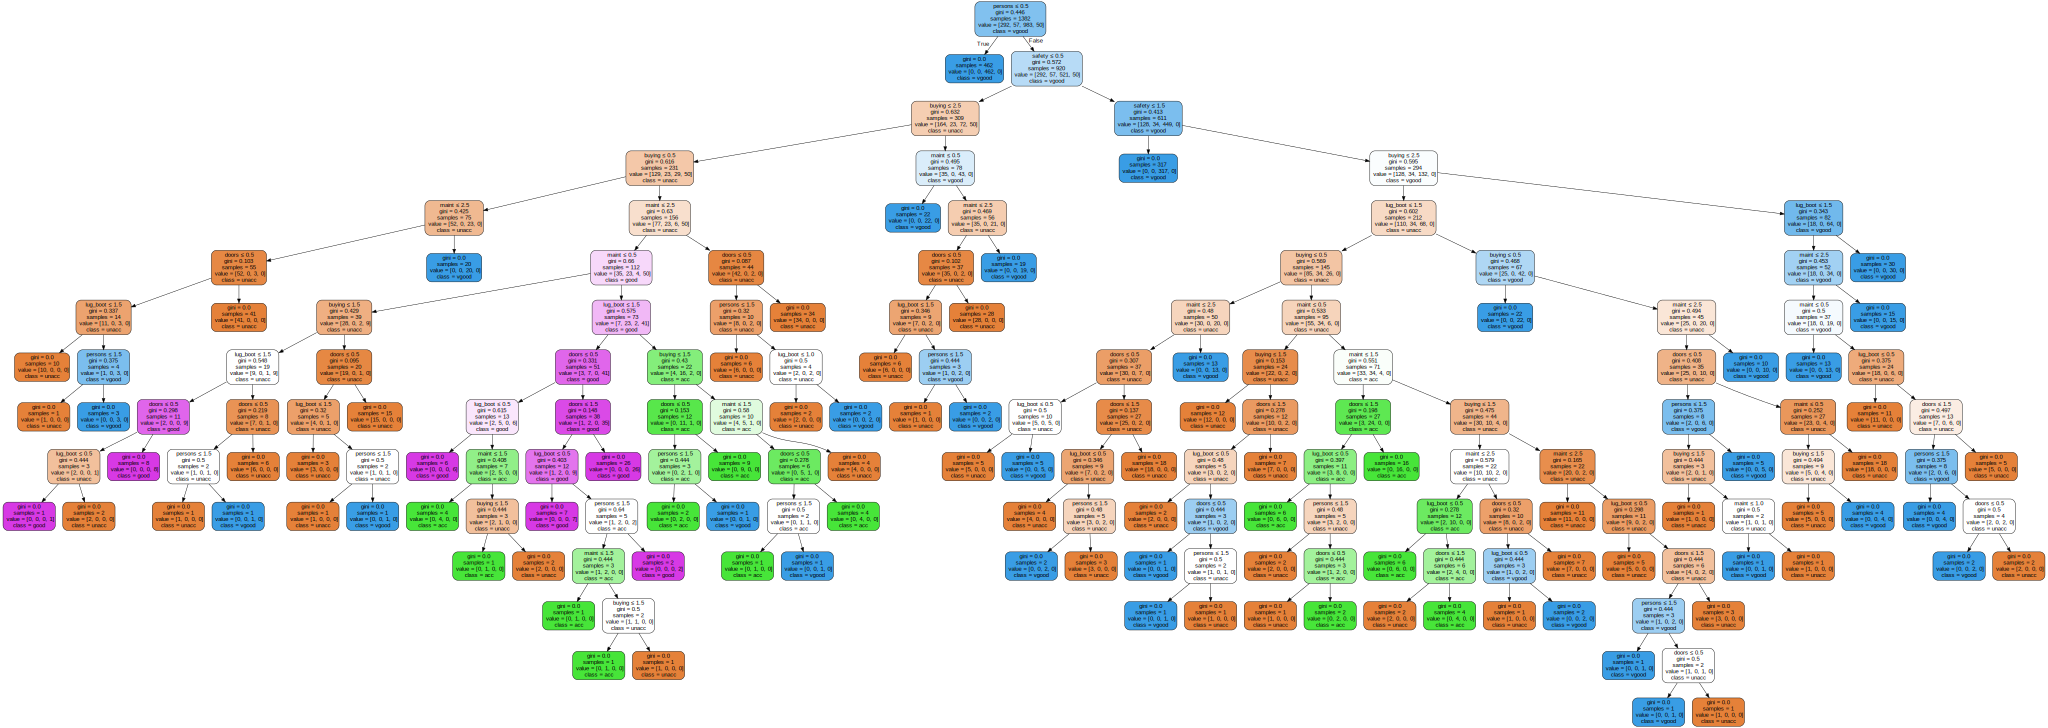

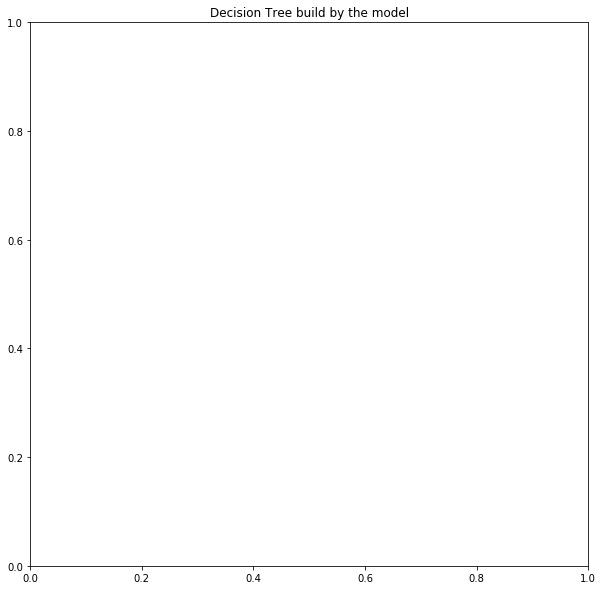

In [87]:
fig, ax = plt.subplots(figsize=(10,10))
#ax.set_title('Decision Tree build by the model')
graph = graphviz.Source(dot_data)
graph
#plt.savefig('images/tree.png')